In [1]:
import pandas as pd 
import numpy as np
import os
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('data_for_ann.csv')

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['user'], axis=1, inplace=True)

In [4]:
x=data.iloc[:,0:3]
y=data.iloc[:,3]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
def KNN(n, xtrain, xtest, ytrain):
    knn=KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', leaf_size=30, 
                        p=2, metric='minkowski', metric_params=None, n_jobs=None)
    knn.fit(xtrain, ytrain)
    kpred=knn.predict(xtest)

    return knn, kpred

In [11]:
precision=[]
recall=[]
FP=[]

def k_opt(xtrain, ytrain, xtest, ytest):
    global precision,recall, FP

    for i in range(1, 30):
        knn_obj, kpred_value = KNN(i,xtrain,xtest,ytrain)
        r=recall_score(ytest, kpred_value)
        p=precision_score(ytest, kpred_value)
        print("At k=", i,"\nTrain score =", knn_obj.score(xtrain,ytrain), end='')
        print(" | Test Score =", knn_obj.score(xtest,ytest), end='')
        print(" | Confusion matrix:", confusion_matrix(ytest, kpred_value))
        print(" | Recall", r)
        print(" | precision", p)
        recall.append(r)
        precision.append(p)
        FP.append(confusion_matrix(ytest, kpred_value)[0][1])
        
        print()

In [12]:
k_opt(X_train, y_train,X_test, y_test)

At k= 1 
Train score = 1.0 | Test Score = 0.9090909090909091 | Confusion matrix: [[29  3]
 [ 0  1]]
 | Recall 1.0
 | precision 0.25

At k= 2 
Train score = 0.9473684210526315 | Test Score = 0.8787878787878788 | Confusion matrix: [[29  3]
 [ 1  0]]
 | Recall 0.0
 | precision 0.0

At k= 3 
Train score = 0.9605263157894737 | Test Score = 0.8484848484848485 | Confusion matrix: [[27  5]
 [ 0  1]]
 | Recall 1.0
 | precision 0.16666666666666666

At k= 4 
Train score = 0.9210526315789473 | Test Score = 0.8484848484848485 | Confusion matrix: [[27  5]
 [ 0  1]]
 | Recall 1.0
 | precision 0.16666666666666666

At k= 5 
Train score = 0.9473684210526315 | Test Score = 0.8484848484848485 | Confusion matrix: [[27  5]
 [ 0  1]]
 | Recall 1.0
 | precision 0.16666666666666666

At k= 6 
Train score = 0.9473684210526315 | Test Score = 0.8787878787878788 | Confusion matrix: [[28  4]
 [ 0  1]]
 | Recall 1.0
 | precision 0.2

At k= 7 
Train score = 0.9473684210526315 | Test Score = 0.8787878787878788 | Confus

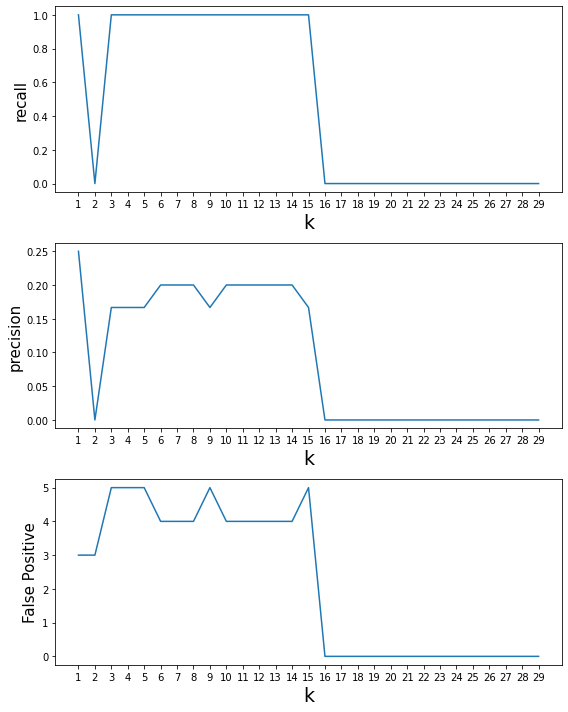

In [13]:
# plt.rcParams["figure.figsize"] = [9.0, 5]
fig, (s1,s2,s3) = plt.subplots(3,figsize=(8,10))
x=np.arange(1,30)

s1.set_xticks(np.arange(1,30))
s1.plot(x, recall)
s1.set_xlabel('k', fontsize=19)
s1.set_ylabel('recall', fontsize=15)


s2.set_xticks(np.arange(1,30))
s2.plot(x, precision)
s2.set_xlabel('k', fontsize=19)
s2.set_ylabel('precision', fontsize=15)


s3.set_xticks(np.arange(1,30))
s3.plot(x, FP)
s3.set_xlabel('k', fontsize=19)
s3.set_ylabel('False Positive', fontsize=15)

fig.tight_layout()


### Applying KNN  k=7

In [16]:
knn, kpred_value = KNN(7,X_train,X_test,y_train)
r=recall_score(y_test, kpred_value)
p=precision_score(y_test, kpred_value)
print(f'train accuracy {knn.score(X_train, y_train)}')
print(f'test accuracy {knn.score(X_test, y_test)}')
print(f'recall {r}')
print(f'precision {p}')
print(confusion_matrix(y_test, kpred_value))
print("f1 score", f1_score(y_test, kpred_value))
# print(f'predicted values: {knn.predict(X_test)}')
# print(f'{y_test}')


train accuracy 0.9473684210526315
test accuracy 0.8787878787878788
recall 1.0
precision 0.2
[[28  4]
 [ 0  1]]
f1 score 0.33333333333333337
